In [79]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import linear_model as lm
import itertools
import math
import sys



In [19]:
# plot helper method:

def plot_distribution(data, label):
    fig, axs = plt.subplots(nrows=2, figsize=(10, 8))  # Adjust figsize as needed
    col = data[label]
    
    # Plot the distribution using histplot
    sns.histplot(col, ax=axs[0], kde=True)  # Use kde=True for density curve
    
    # Plot the box plot
    sns.boxplot(x=col, width=0.3, ax=axs[1], showfliers=False)
    
    # Align axes
    spacer = np.max(col) * 0.05
    xmin = np.min(col) - spacer
    xmax = np.max(col) + spacer
    axs[0].set_xlim((xmin, xmax))
    axs[1].set_xlim((xmin, xmax))
    
    # Remove some axis text
    axs[0].xaxis.set_visible(False)
    axs[0].yaxis.set_visible(False)
    axs[1].yaxis.set_visible(False)
    
    # Set y-axis label for the distribution plot
    axs[0].set_ylabel("Density")
    
    # Set title
    fig.suptitle("Distribution of " + label)
    
    # Display the mean and median values on the box plot
    mean_val = np.mean(col)
    median_val = np.median(col)
    axs[1].text(0.05, 0.8, f"Mean: {mean_val:.2f}", transform=axs[1].transAxes)
    axs[1].text(0.05, 0.7, f"Median: {median_val:.2f}", transform=axs[1].transAxes)
    
    # Adjust layout
    plt.subplots_adjust(hspace=0)
    
    plt.show()

In [17]:
data = pd.read_csv('Data.csv') # import the data
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


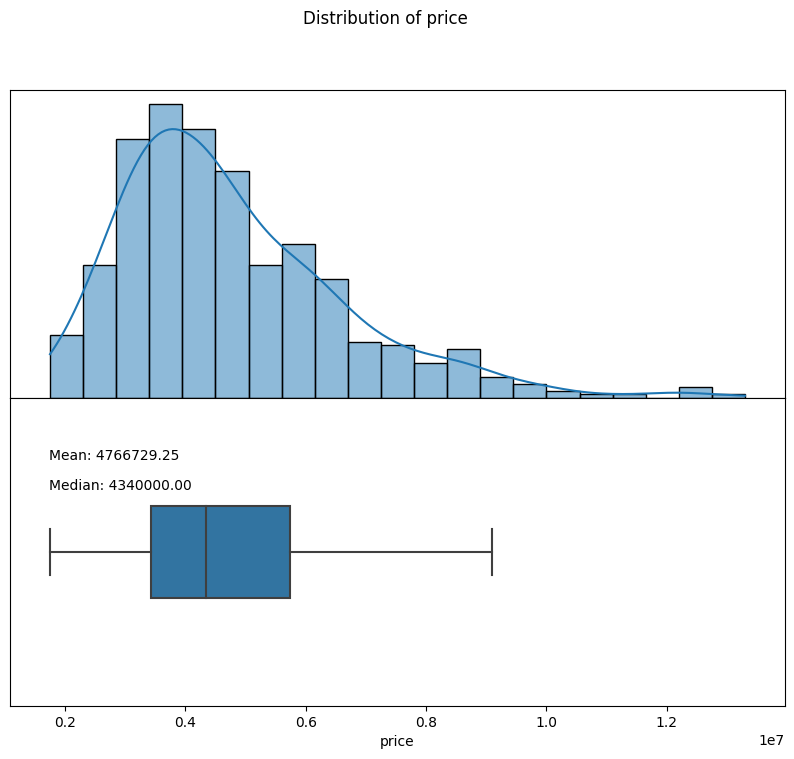

In [20]:
plot_distribution(data, 'price')

In [23]:

# check for NULL values and if there are NULL values print the quantity
if not data.isnull().values.any():
    print('No NULL values')
else:
    cnt = data.isnull().sum()
    print('Number of NULL values: ' + str(cnt))
encodedData = pd.DataFrame(data)
encodedData['mainroad'] = encodedData['mainroad'].map({'yes': int(1) , 'no': int(0)})
encodedData['guestroom'] = encodedData['guestroom'].map({'yes': 1 , 'no': 0})
encodedData['basement'] = encodedData['basement'].map({'yes': 1 , 'no': 0})
encodedData['hotwaterheating'] = encodedData['hotwaterheating'].map({'yes': 1 , 'no': 0})
encodedData['airconditioning'] = encodedData['airconditioning'].map({'yes': 1 , 'no': 0})
encodedData['prefarea'] = encodedData['prefarea'].map({'yes': 1 , 'no': 0})
encodedData = pd.get_dummies(encodedData)
# Shuffle data
shuffledData = encodedData#encodedData.sample(frac=1).reset_index(drop=True)

# Ensure all data is numeric and there are no missing values
numericData = shuffledData.select_dtypes(include=[np.number]).dropna()
numericData_np = numericData.to_numpy()

# Multivariate Outlier Detection using Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01)
outliers = iso_forest.fit_predict(numericData_np)
outlier_indices = (outliers == -1)
print(f'Number of identified outliers: {outlier_indices.sum()}/{len(numericData)}')

# Remove outliers from the dataset
numericData_clean = numericData[~outlier_indices]
numericData_clean.reset_index(drop=True, inplace=True)

print(f'Dataset size after outlier removal: {numericData_clean.shape[0]}')

# Optionally, view the cleaned data
#print(numericData_clean)
mean = numericData_clean['price'].mean()
#print(f'average house: {mean}')

No NULL values
Number of identified outliers: 6/545
Dataset size after outlier removal: 539


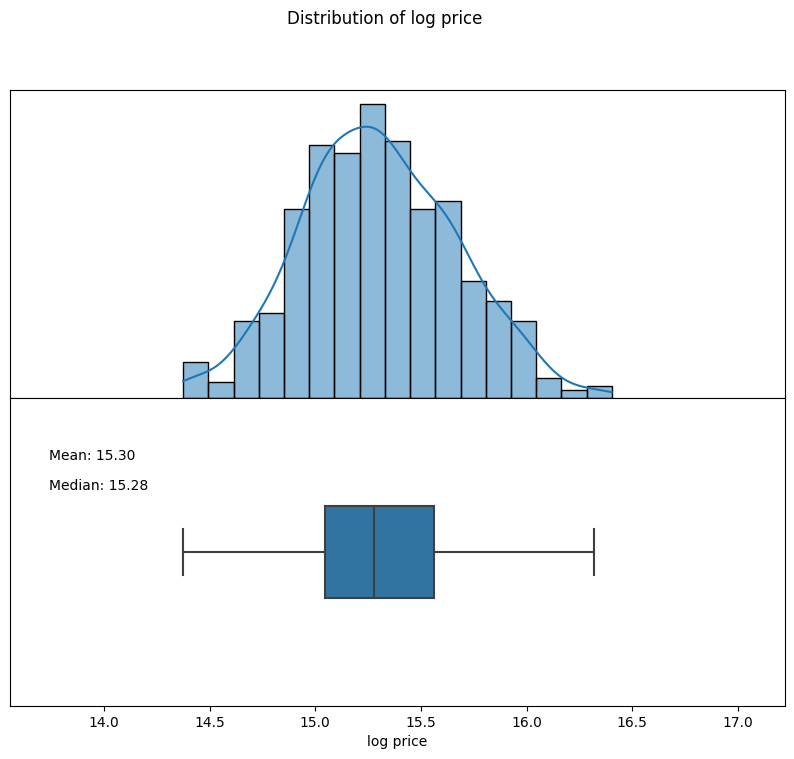

In [22]:
plot_distribution(numericData_clean, 'price')

In [66]:
train1=numericData_clean.sample(frac=0.9,random_state=90)
test1=numericData_clean.drop(train1.index)
train2=numericData_clean.sample(frac=0.9,random_state=80)
test2=numericData_clean.drop(train2.index)
train3=numericData_clean.sample(frac=0.9,random_state=70)
test3=numericData_clean.drop(train3.index)
train4=numericData_clean.sample(frac=0.9,random_state=60)
test4=numericData_clean.drop(train4.index)
train5=numericData_clean.sample(frac=0.9,random_state=50)
test5=numericData_clean.drop(train5.index)
train6=numericData_clean.sample(frac=0.9,random_state=40)
test6=numericData_clean.drop(train6.index)
train7=numericData_clean.sample(frac=0.9,random_state=30)
test7=numericData_clean.drop(train7.index)
train8=numericData_clean.sample(frac=0.9,random_state=20)
test8=numericData_clean.drop(train8.index)
train9=numericData_clean.sample(frac=0.9,random_state=10)
test9=numericData_clean.drop(train9.index)
train10=numericData_clean.sample(frac=0.9,random_state=0)
test10=numericData_clean.drop(train10.index)

In [67]:
train1.to_csv('data/train1.csv')
test1.to_csv('data/test1.csv')
train2.to_csv('data/train2.csv')
test2.to_csv('data/test2.csv')
train3.to_csv('data/train3.csv')
test3.to_csv('data/test3.csv')
train4.to_csv('data/train4.csv')
test4.to_csv('data/test4.csv')
train5.to_csv('data/train5.csv')
test5.to_csv('data/test5.csv')
train6.to_csv('data/train6.csv')
test6.to_csv('data/test6.csv')
train7.to_csv('data/train7.csv')
test7.to_csv('data/test7.csv')
train8.to_csv('data/train8.csv')
test8.to_csv('data/test8.csv')
train9.to_csv('data/train9.csv')
test9.to_csv('data/test9.csv')
train10.to_csv('data/train10.csv')
test10.to_csv('data/test10.csv')
numericData_clean.to_csv('data/numericData_clean.csv')


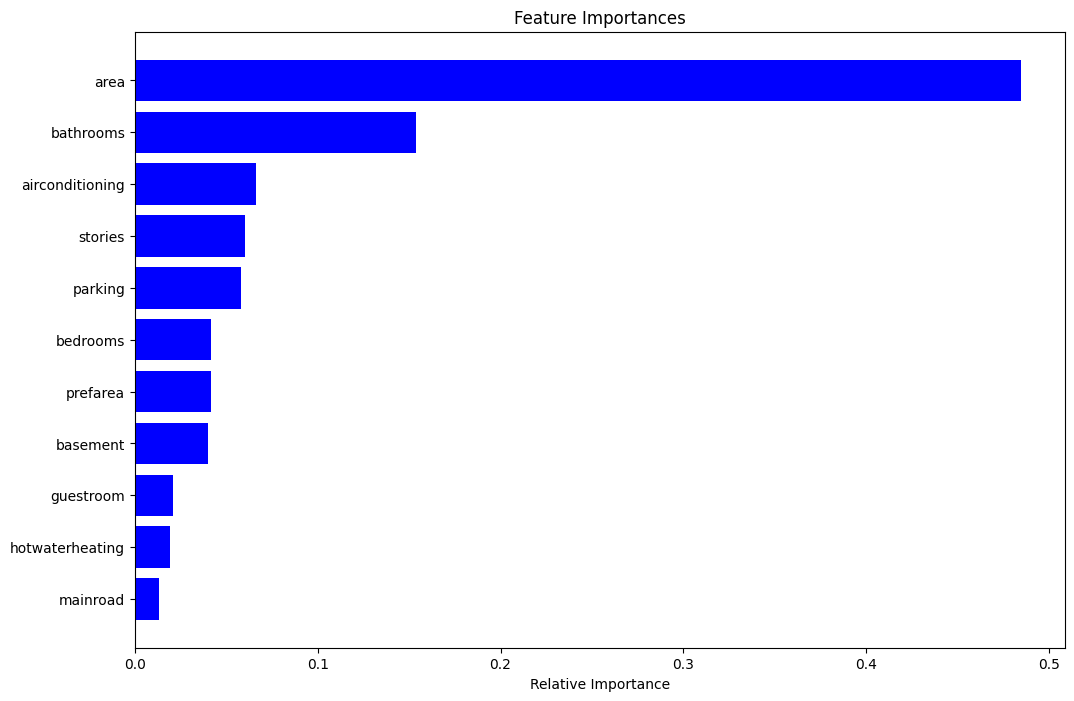

Estimated price: $ 8416660.0


In [71]:
# Function to estimate house price
def estimate_house_price(properties, model, feature_columns):
    # Preparing the input data for prediction
    input_data = pd.DataFrame([properties], columns=feature_columns)
    input_data = input_data.fillna(0)  # Handling any missing columns

    # Predicting the price
    estimated_price = model.predict(input_data)[0]
    return estimated_price


train_data = pd.read_csv('./data/numericData_clean.csv')
test_data = pd.read_csv('./data/test1.csv')
train_data = train_data.drop(train_data.columns[0], axis=1)
test_data = test_data.drop(test_data.columns[0], axis=1)

# Preparing the data
X_train = train_data.drop(['price'], axis=1)
y_train = train_data['price']
X_test = test_data.drop(['price'], axis=1)
y_test = test_data['price']

# Training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Example usage of the function
example_properties = {
    'area': 12090, 
    'bedrooms': 4, 
    'bathrooms': 2, 
    'stories': 2, 
    'mainroad': 1, 
    'guestroom': 0, 
    'basement': 0, 
    'hotwaterheating': 0, 
    'airconditioning': 0, 
    'parking': 2, 
    'prefarea': 1
}

estimated_price = estimate_house_price(example_properties, rf_model, X_train.columns)
print("Estimated price: $", estimated_price)

Mean Squared Error:  225579061136.31912
Mean Absolute Error:  344392.695781893
R-squared:  0.9273531511828581


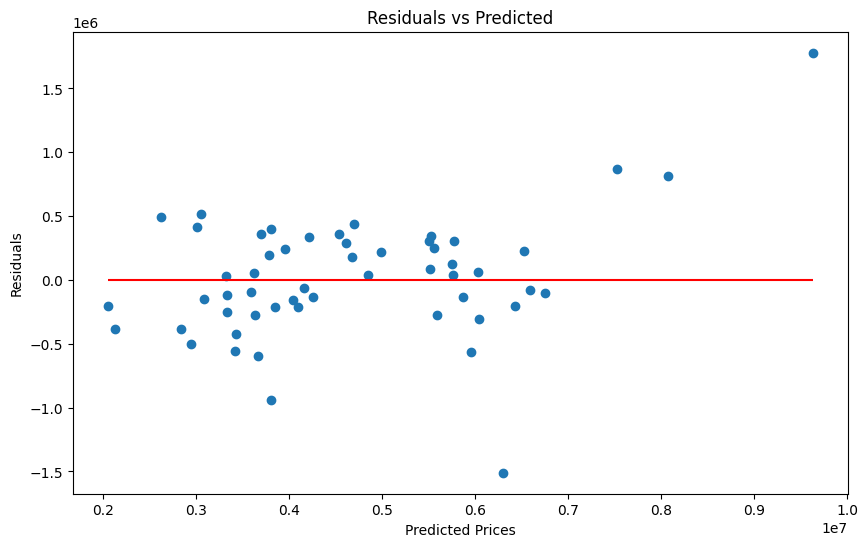

In [72]:

# Predictions on test data
y_pred = rf_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


In [73]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Converting the scores to positive and then taking the square root (since these are negative MSE scores)
rmse_scores = np.sqrt(-cv_scores)

print("RMSE scores for each fold:", rmse_scores)
print("Average RMSE score:", rmse_scores.mean())


RMSE scores for each fold: [2740012.33605245 1231427.38474371 1121641.15006091  811345.31217256
 1425253.08701299]
Average RMSE score: 1465935.8540085224


In [145]:
# Linear Regression Helper Methods:

def linfit(data, target, columns):
    """
    Fits a multivariable linear regression model using the specified columns
    from the input DataFrame and returns the model and its equation.

    Parameters:
    - data: DataFrame containing the data.
    - target: The name of the target variable (dependent variable).
    - columns: List of column names to use as independent variables (features).

    Returns:
    - model: The fitted linear regression model.
    - equation: The equation of the linear regression model.
    """
    # Extract the independent variables (X) and the dependent variable (y)
    X = data[columns]
    y = data[target]

    # Initialize and fit the linear regression model
    model = lm.LinearRegression(fit_intercept=True)
    model.fit(X, y)

    # Get the coefficients and intercept
    coefficients = model.coef_
    intercept = model.intercept_
    
    # Calculate the root mean squared error (RMSE)
    y_pred = model.predict(X)
    rmse = math.sqrt(mean_squared_error(y, y_pred))

    # Create the equation string
    equation = f"{target} = {intercept:.2f} "
    for col, coef in zip(columns, coefficients):
        equation += f"+ {coef:.2f} * {col} "
    #print(equation)

    return model, equation, rmse

def res_graph(model, data, target, columns):
    """
    Calculates the residuals of the model compared to training data and
    plots a residual plot.

    Args:
    - model: Fitted regression model (e.g., LinearRegression)
    - data: DataFrame containing the training data used to fit the model

    Returns:
    - None (plots the residual plot)
    """
    # Extract the independent variables (X) and the dependent variable (y) from the data
    X = data[columns]
    y = data[target]

    # Calculate predicted values
    y_pred = model.predict(X)

    # Calculate residuals (observed - predicted)
    residuals = y - y_pred
    
    # calculate equation:
    coefficients = model.coef_
    intercept = model.intercept_
    
    # Calculate the root mean squared error (RMSE)
    y_pred = model.predict(X)
    rmse = math.sqrt(mean_squared_error(y, y_pred))
    
    # Create a residual plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, color='blue')
    plt.axhline(0, color='red', linestyle='--', linewidth=2)
    plt.title("Residual Plot")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    
    # Construct and display the model equation
    base_y_position = 0.9  # Starting position for the equation text
    line_length_limit = 50  # Maximum characters per line
    current_line = f"Model Equation: Y = {intercept:.2f} + "
    for i, coef in enumerate(coefficients):
        addition = f"{coef:.2f} * {X.columns[i]}"
        if i < len(coefficients) - 1:
            addition += " + "

        # Check if adding the next term exceeds the line length limit
        if len(current_line) + len(addition) > line_length_limit:
            plt.text(0.05, base_y_position, current_line, transform=plt.gca().transAxes, fontsize=12, color='red')
            base_y_position -= 0.05  # Move to the next line
            current_line = addition  # Start a new line
        else:
            current_line += addition

    # Display the last line of the equation
    plt.text(0.05, base_y_position, current_line, transform=plt.gca().transAxes, fontsize=12, color='red')

    # Display RMSE
    plt.text(0.05, base_y_position - 0.05, "RMSE: " + str(rmse), transform=plt.gca().transAxes, fontsize=12, color='red')

    plt.show()


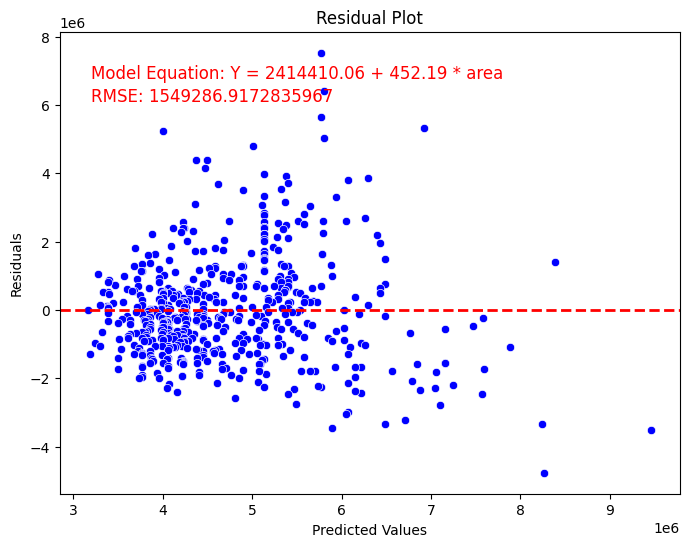

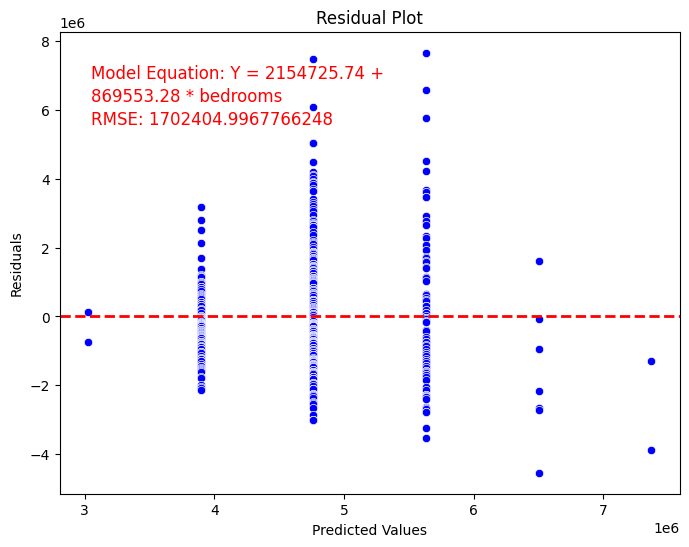

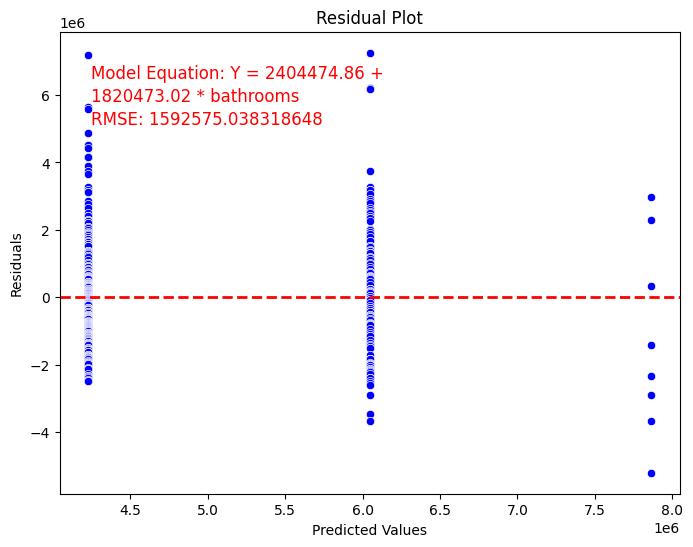

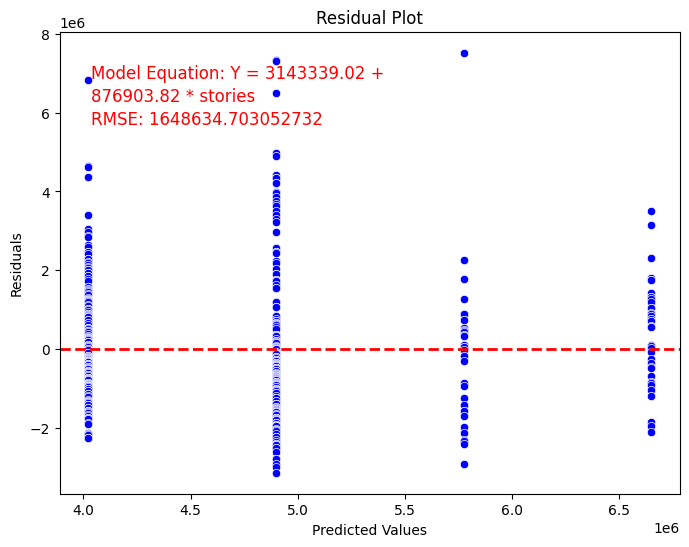

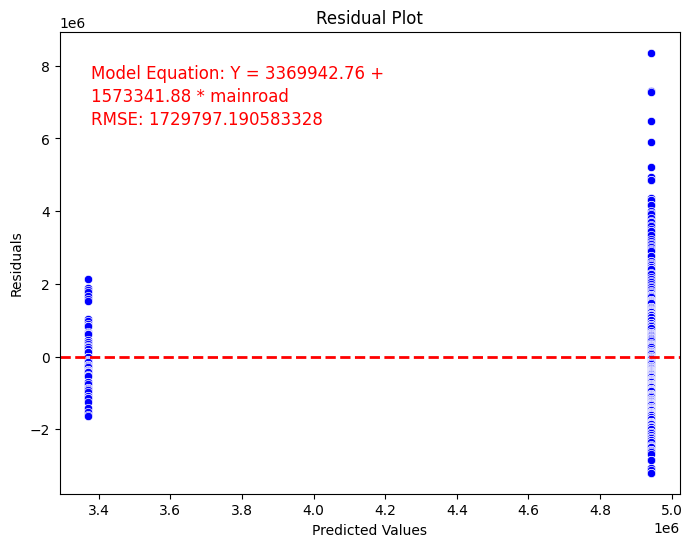

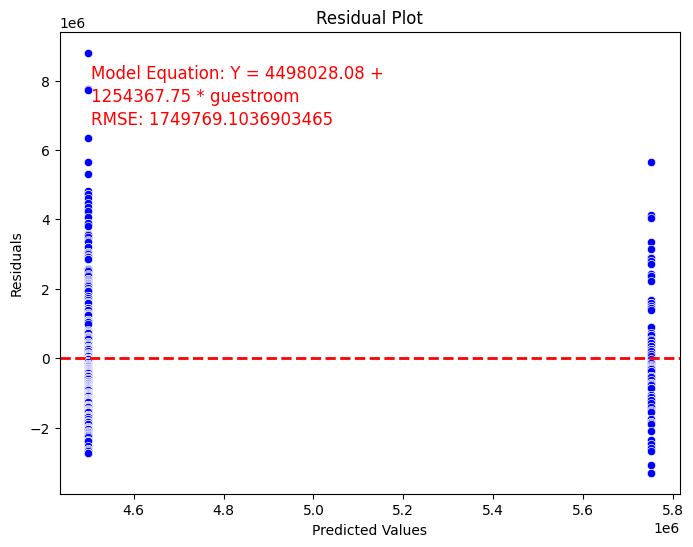

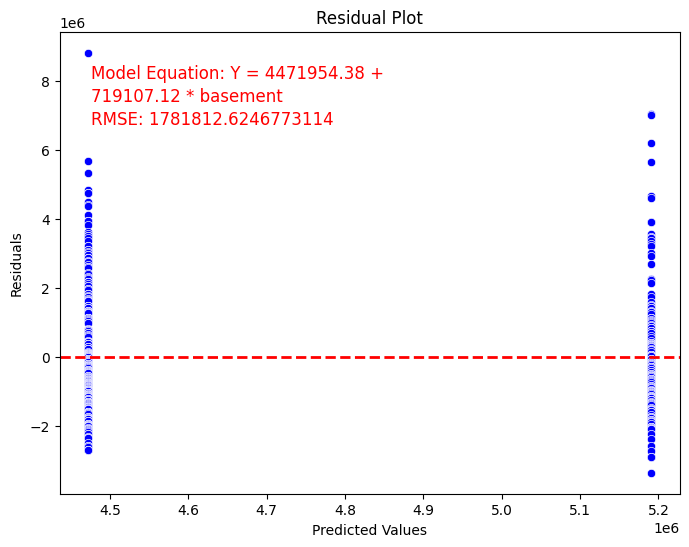

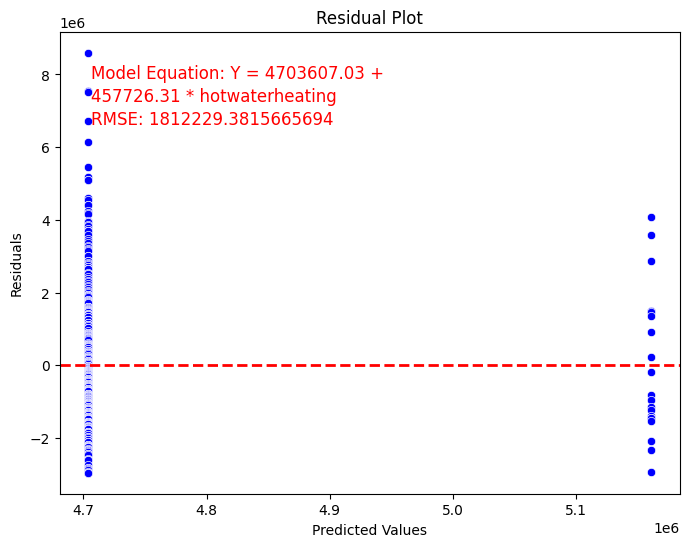

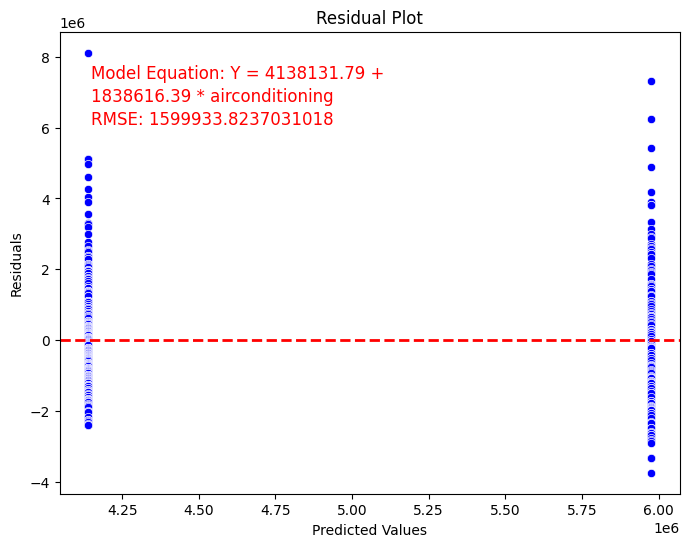

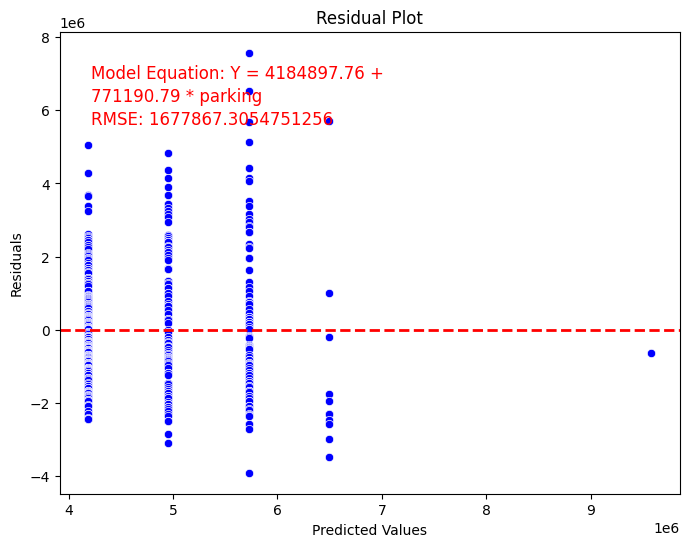

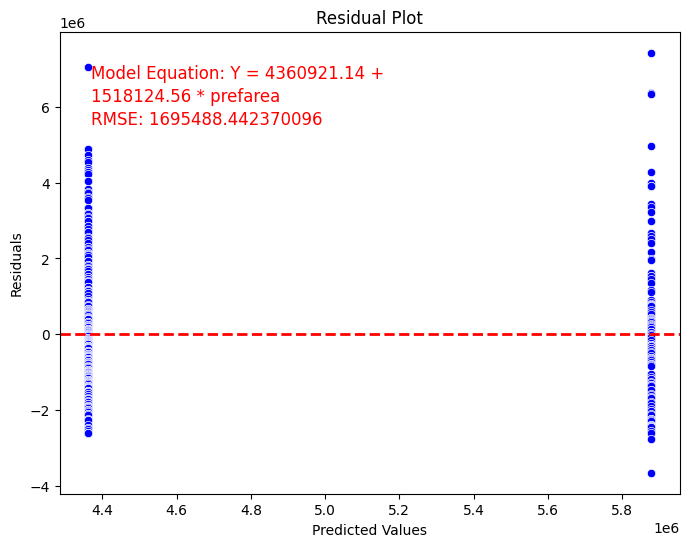

In [146]:
# Linear Regression Model:

reg_data = numericData_clean.copy()
reg_data['log price'] = np.log(reg_data['price'])

labels = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

for label in labels:
    model, equation, RMSE = linfit(reg_data, 'price', [label])
    res_graph(model, reg_data, 'price', [label])



In [127]:
labels = ['area', 'log(area)', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

# Add area^2
reg_data['log(area)'] = np.log(reg_data['area'])

#model, equation, RMSE = linfit(reg_data, 'price', ['log(area)'])
#res_graph(model, reg_data, 'price', ['log(area)'])
#model, equation, RMSE = linfit(reg_data, 'price', ['area'])
#res_graph(model, reg_data, 'price', ['area'])


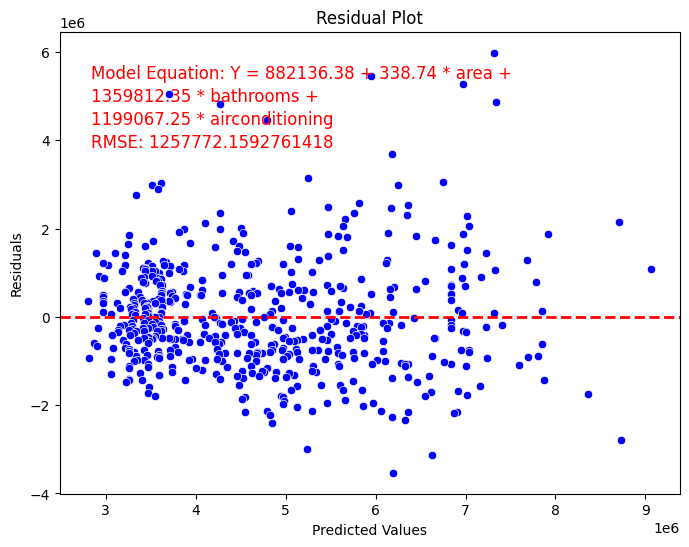

In [135]:
# Generate all combinations of the labels without repetition
combinations = []
for r in range(1, min(3, len(labels)) + 1):
    combos = itertools.combinations(labels, r)
    for combo in combos:
        # Remove commas from the labels in the combination
        clean_combo = [label.replace(",", "") for label in combo]
        combinations.append(clean_combo)

bestModel, bestEquation, bestRMSE = linfit(reg_data, 'price', ['area'])
bestCombo = ['area']

# Create Linear Regression Models:
for combo in combinations:
    model, equation, RMSE = linfit(reg_data, 'price', combo)
    if RMSE < bestRMSE:
        #res_graph(model, reg_data, 'price', combo)
        bestRMSE = RMSE
        bestModel = model
        bestEquation = equation
        bestCombo = combo

res_graph(bestModel, reg_data, 'price', bestCombo)
